# **Preparação de Dados para Modelagem**

# **1. Descrição da Base de Dados**

**Base de Dados**: [Kaggle - Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)

O conjunto de dados é um dataset simulado de transações de cartão de crédito contendo transações legítimas e fraudulentas no período de 01 de Janeiro de 2019 à 31 de Dezembro de 2020. A base contém cartões de crédito de 1.000 clientes que realizam transações com um conjunto de 800 comerciantes.

**Descrição das features no Kaggle**:
1. `Unnamed: 0`: Identificador único de cada linha
2. `trans_date_trans_time`: Data e hora da transação
3. `cc_num`: Número do cartão de crédito do cliente
4. `merchant`: Nome do comerciante
5. `category`: Categoria do comerciante
6. `amt`: Valor da Transação
7. `first`: Primeiro nome do titular do cartão de crédito
8. `last`: Último nome do titular do cartão de crédito
9. `gender`: Gênero do titular do cartão de crédito
10. `street`: Endereço do titular do cartão de crédito
11. `city`: Cidade do titular do cartão de crédito
12. `state`: Estado do titular do cartão de crédito
13. `zip`: Código postal do titular do cartão de crédito
14. `lat`: Latitude da localização do titular do cartão de crédito
15. `long`: Longitude da localização do titular do cartão de crédito
16. `city_pop`: População da cidade do titular do cartão de crédito
17. `job`: Cargo do titular do cartão de crédito
18. `dob`: Data de nascimento do titular do cartão de crédito
19. `trans_num`: Número da transação
20. `unix_time`: Hora da transação no UNIX
21. `merch_lat`: Latitude da localização do Comerciante
22. `merch_long`: Longitude da localização do Comerciante
23. `is_fraud`: Variável resposta e assume valor 1 em caso de fraude e 0, caso contrário.

A base possui `1.296.675` transações, das quais apenas `7.506` (0,579%) representam transações fraudulentas.

# **1. Análise descritiva dos dados**

Com relação às features presentes no dataset, é possível classificá-las em:
- `Numéricas`
    1. `amt`: Valor da Transação
    2. `lat`: Latitude da localização do titular do cartão de crédito
    3. `long`: Longitude da localização do titular do cartão de crédito
    4. `city_pop`: População da cidade do titular do cartão de crédito
    5. `merch_lat`: Latitude da localização do Comerciante
    6. `merch_long`: Longitude da localização do Comerciante
- `Categóricas Nominais`
    1. `Unnamed: 0`: Identificador único de cada linha
    2. `cc_num`: Número do cartão de crédito do cliente
    3. `merchant`: Nome do comerciante
    4. `category`: Categoria do comerciante
    5. `first`: Primeiro nome do titular do cartão de crédito
    6. `last`: Último nome do titular do cartão de crédito
    7. `gender`: Gênero do titular do cartão de crédito
    8. `street`: Endereço do titular do cartão de crédito
    9. `city`: Cidade do titular do cartão de crédito
    10. `state`: Estado do titular do cartão de crédito
    11. `zip`: Código postal do titular do cartão de crédito
    12. `job`: Cargo do titular do cartão de crédito
    13. `trans_num`: Número da transação
- `Temporária`
    1. `trans_date_trans_time`: Data e hora da transação
    2. `dob`: Data de nascimento do titular do cartão de crédito
    3. `unix_time`: Hora da transação no UNIX

**Funções úteis**

In [1]:
# Exibe valores nulos ou espaços em branco por coluna
def exibe_colunas_com_valores_nulos_ou_vazios(df):
    nulos_e_vazios_por_coluna = df.apply(
        lambda col: col.isnull().sum() + 
                    col.map(lambda x: isinstance(x, str) and x.strip() == "").sum()

    )
    print("Quantidade de valores nulos ou apenas espaços em branco  por coluna:")
    print(nulos_e_vazios_por_coluna)

# Exibe valores nulos ou espaços em branco por coluna
def exibe_colunas_com_um_valor_específico(df, value='unknown'):
    nulos_e_vazios_por_coluna = df.apply(
        lambda col: col.map(lambda x: isinstance(x, str) and x.strip().lower() == value).sum()

    )
    print("Quantidade de \'unknown\' por coluna:")
    print(nulos_e_vazios_por_coluna)


def exibe_min_e_max_feature_numerica(df, colunas):
    for coluna in colunas:
        print(f"Coluna: {coluna}")
        print(f"Valor mínimo: {df[coluna].min()}")
        print(f"Valor máximo: {df[coluna].max()}")
        print("-" * 40)


# Listar valores únicos, suas quantidades e informar valores nulos ou vazios
def exibe_qtd_por_feature_categorica(df, colunas):
    for column in colunas:
        print(f"Coluna: {column}")
        
        value_counts = df[column].value_counts().sort_values(ascending=False)

        print(value_counts)
        print("-" * 40)

**A base pode ser obtida em:** 
 - https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv


In [2]:
import pandas as pd

# A base se encontra em: https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv
df = pd.read_csv('../data/raw/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Devido ao tamanho da base original, que contém `1.296.675` transações, foi extraída uma amostra contendo `1%` dos dados (equivalente a `12.966` transações) para uso nos testes iniciais.

A amostragem foi realizada de forma estratificada, garantindo que a proporção entre as classes fosse mantida na amostra reduzida.

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Verificando a proporção de fraudes preservada
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))

df, _ = train_test_split(
    df, 
    test_size=0.99,  # Mantém apenas 1% da base
    stratify=df['is_fraud'], 
    random_state=42
)

# Verificando a proporção de fraudes preservada
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
is_fraud
0    12891
1       75
Name: count, dtype: int64
is_fraud
0    0.994216
1    0.005784
Name: proportion, dtype: float64


### **1.1. Remover Variável `Unnamed: 0`**
A variável `Unnamed: 0` é apenas um identificador único de cada linha e não será utilizada na modelagem.

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
9638,2019-01-06 23:35:09,38544312728630,fraud_Ziemann-Waters,health_fitness,78.61,Veronica,Burton,F,08932 Bonnie Stravenue,Bonita Springs,...,26.3771,-81.7334,51427,Claims inspector/assessor,1991-08-21,8196b1cc93d59241dc2978bd163c8485,1325892909,25.439671,-80.912177,0
930366,2020-01-04 18:16:23,4640395708703,fraud_Powlowski-Weimann,food_dining,26.46,Melissa,Krause,F,67632 Martin Gateway,Fordoche,...,30.6576,-91.6264,1178,Community education officer,1951-06-13,37b78b0e039d541d8240b849b8a90eb5,1357323383,30.111240,-90.893199,0
980179,2020-02-02 12:49:41,2288748891690227,"fraud_Hettinger, McCullough and Fay",home,18.60,Kathleen,Heath,F,9297 Victor Rest Apt. 382,Albuquerque,...,35.0561,-106.5506,641349,Charity officer,1967-01-24,652a23134568a9d8054476368a40230b,1359809381,34.567248,-106.205172,0
27076,2019-01-16 13:12:24,4560395181594436016,fraud_Morissette LLC,entertainment,25.29,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,Lakeport,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,ea41f55608832415b18689d2d94e5ea1,1326719544,38.839916,-123.398142,0
1042997,2020-03-08 21:04:59,345933964507467,fraud_Bins-Howell,personal_care,38.77,Carol,Dillon,F,27479 Reeves Dale,Whaleyville,...,38.4121,-75.2811,718,Regulatory affairs officer,1985-03-19,81c22db054c249002bd4809eddbe56ca,1362776699,39.144211,-75.538109,0


### **1.2. Identificar a existência de valores NULOS ou valores que são apenas espaços em branco**

In [5]:
print(exibe_colunas_com_valores_nulos_ou_vazios(df))

Quantidade de valores nulos ou apenas espaços em branco  por coluna:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
None


**Conclusões**:
- Conforme observado, nenhuma das features apresenta valores nulos ou compostos apenas por espaços em branco. Portanto, não é necessário realizar tratamento relacionado a valores ausentes ou inválidos neste aspecto.

### **1.3. Features Numéricas**

####  **1.3.1. Exibir os valores mínimos e máximos de cada variável numérica**

In [6]:
features_numericas = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

exibe_min_e_max_feature_numerica(df, features_numericas)

Coluna: amt
Valor mínimo: 1.0
Valor máximo: 6337.25
----------------------------------------
Coluna: lat
Valor mínimo: 20.0271
Valor máximo: 65.6899
----------------------------------------
Coluna: long
Valor mínimo: -165.6723
Valor máximo: -67.9503
----------------------------------------
Coluna: city_pop
Valor mínimo: 23
Valor máximo: 2906700
----------------------------------------
Coluna: merch_lat
Valor mínimo: 19.04188
Valor máximo: 66.514576
----------------------------------------
Coluna: merch_long
Valor mínimo: -166.51837700000002
Valor máximo: -66.962913
----------------------------------------


**Conclusões**:
- Para as features numéricas, foram analisados os valores mínimos e máximos com o objetivo de identificar possíveis valores anômalos, como:
    - `latitude` fora do intervalo válido [-90, 90],
    - `longitude` fora do intervalo [-180, 180],
    - valores excessivamente altos ou negativos para o valor da transação (`amt`) e para a população da cidade do titular do cartão (`city_pop`).
- A análise não identificou valores discrepantes nessas variáveis, indicando consistência nos dados avaliados.

#### **1.3.2. Feature Valor da Transação (`amt`)**

In [7]:
feature_amt = df['amt']


metrics = {
    'mean': feature_amt.mean(),
    'std': feature_amt.std(),
    'q1': feature_amt.quantile(0.25),
    'median': feature_amt.median(),
    'q3': feature_amt.quantile(0.75),
    'mode': feature_amt.mode().tolist(),
    'min': feature_amt.min(),
    'max': feature_amt.max(),
    'nulls': feature_amt.isnull().sum()
}

print("Métricas para a variável Valor da Transação ('amt'):")
print(f"Média: {metrics['mean']}")
print(f"Desvio Padrão: {metrics['std']}")
print(f"Q1: {metrics['q1']}")
print(f"Mediana: {metrics['median']}")
print(f"Q3: {metrics['q3']}")
print(f"Moda: {metrics['mode']}")
print(f"Valor mínimo: {metrics['min']}")
print(f"Valor máximo: {metrics['max']}")
print(f"Valores nulos: {metrics['nulls']}")

Métricas para a variável Valor da Transação ('amt'):
Média: 69.75862100879223
Desvio Padrão: 138.1878280792453
Q1: 9.75
Mediana: 47.73
Q3: 83.165
Moda: [4.3, 6.45]
Valor mínimo: 1.0
Valor máximo: 6337.25
Valores nulos: 0


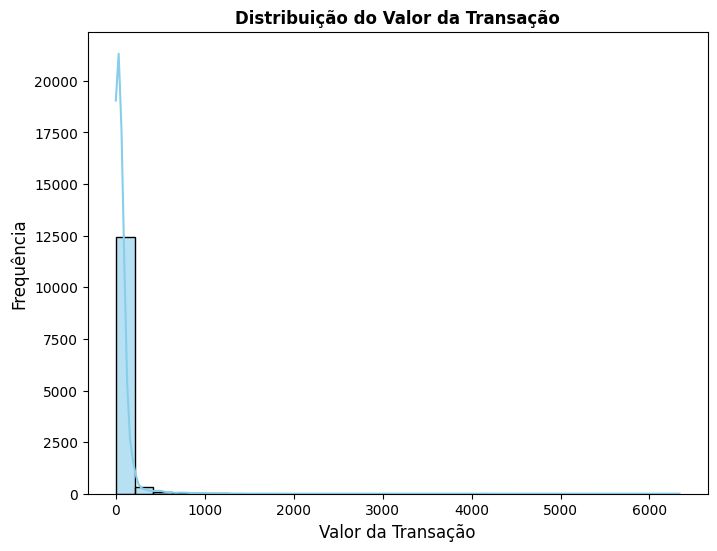

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['amt'], 
    kde=True, 
    color='skyblue', 
    bins=30, 
    alpha=0.6
)

plt.title('Distribuição do Valor da Transação', fontsize=12, weight='bold')
plt.xlabel('Valor da Transação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()


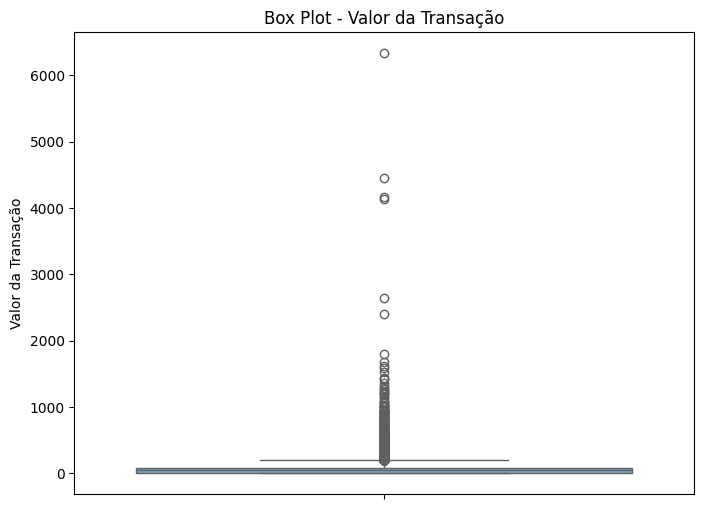

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    y='amt',
    color='#6BAED6'
)
plt.title('Box Plot - Valor da Transação')
plt.ylabel('Valor da Transação')
plt.show()

In [10]:
count = df[df['amt'] < 200].shape[0]
print(f"Percentual de transações < $ 200,00: {(count/df.shape[0]*100):.2f}%")

count = df[(df['amt'] > 350)].shape[0]
print(f"Percentual de transações > $ 350,00: {(count/df.shape[0]*100):.2f}%")

Percentual de transações < $ 200,00: 95.51%
Percentual de transações > $ 350,00: 1.97%


**Transformação Logarítmica + padronização**

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
#O logaritmo de 0 + 1 é ln(1)=0, o que evita erros sem alterar significativamente a análise.
df['amt_log'] = np.log1p(df['amt'])

scaler = StandardScaler()
df['amt_scaled'] = scaler.fit_transform(df[['amt_log']])
#df

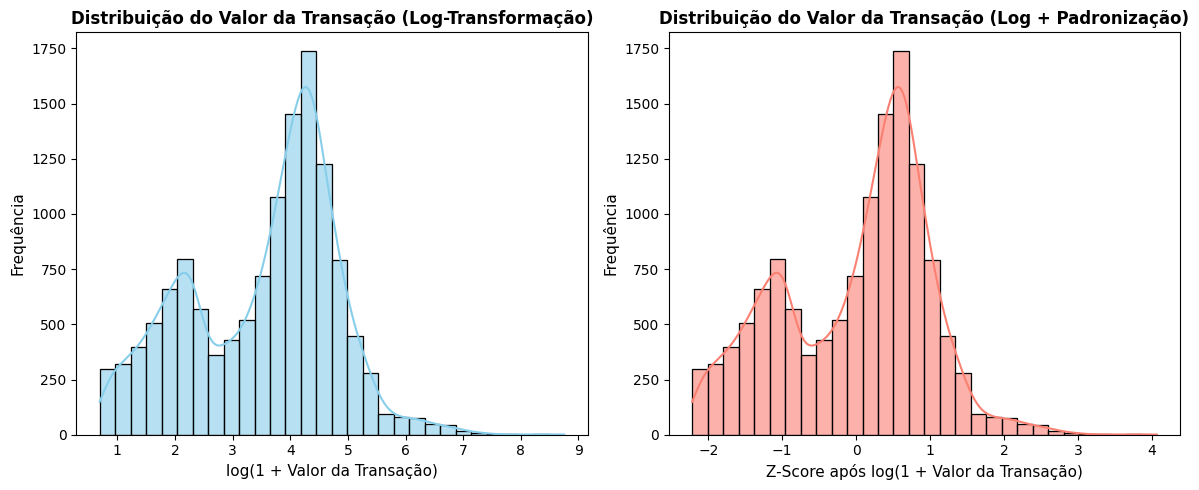

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histograma da Transformação Logarítmica
plt.subplot(1, 2, 1)
sns.histplot(
    df['amt_log'], 
    kde=True, 
    color='skyblue', 
    bins=30, 
    alpha=0.6
)
plt.title('Distribuição do Valor da Transação (Log-Transformação)', fontsize=12, weight='bold')
plt.xlabel('log(1 + Valor da Transação)', fontsize=11)
plt.ylabel('Frequência', fontsize=11)

# Histograma da Transformação Log + Padronização
plt.subplot(1, 2, 2)
sns.histplot(
    df['amt_scaled'], 
    kde=True, 
    color='salmon', 
    bins=30, 
    alpha=0.6
)
plt.title('Distribuição do Valor da Transação (Log + Padronização)', fontsize=12, weight='bold')
plt.xlabel('Z-Score após log(1 + Valor da Transação)', fontsize=11)
plt.ylabel('Frequência', fontsize=11)

plt.tight_layout()
plt.show()


**Conclusões**:
- A análise descritiva das principais métricas estatísticas da feature `valor da transação`, juntamente com a visualização por histograma e boxplot, revela uma distribuição altamente assimétrica à direita. Isso indica que a maioria dos valores está concentrada em faixas mais baixas, com uma cauda longa que se estende em direção a valores mais altos.
- O boxplot evidencia a presença de uma quantidade significativa de outliers. No entanto, esses valores extremos não aparentam ser erros de medição, e sim possíveis transações reais com valores atípicos, mas válidos.
- Algumas estatísticas relevantes a serem destacadas:
    - `25%` das transações tiveram valores inferiores a `$9,65`
    - `95,22`% das transações envolveram valores inferiores a `$200,00`
    - Menos de `2%` das transações superaram o valor de `$350,00`
- Por conta dessa forte assimetria, foram aplicadas as seguintes transformações à feature `valor da transação`:
    1. `Transformação logarítmica`: recomendada para lidar com distribuições assimétricas, essa técnica reduz o impacto dos valores extremos, comprimindo a cauda longa e aproximando a distribuição de uma forma mais simétrica — sem eliminar a relevância dos outliers.
    2. `Padronização (Standardization)`: após a transformação logarítmica, a variável foi padronizada para ter média 0 e desvio padrão 1. Isso é essencial para algoritmos baseados em distância, como `K-Means` e `DBSCAN`, por exemplo, garantindo que essa feature contribua de maneira equilibrada com as demais variáveis no cálculo das distâncias.

#### **1.3.3. População da cidade do titular do cartão de crédito (`city_pop`)**

In [13]:
feature_city_pop = df['city_pop']

metrics = {
    'mean': feature_city_pop.mean(),
    'std': feature_city_pop.std(),
    'q1': feature_city_pop.quantile(0.25),
    'median': feature_city_pop.median(),
    'q3': feature_city_pop.quantile(0.75),
    'mode': feature_city_pop.mode().tolist(),
    'min': feature_city_pop.min(),
    'max': feature_city_pop.max(),
    'nulls': feature_city_pop.isnull().sum()
}

print("Métricas para a variável População da cidade do titular do cartão de crédito ('city_pop'):")
print(f"Média: {metrics['mean']}")
print(f"Desvio Padrão: {metrics['std']}")
print(f"Q1: {metrics['q1']}")
print(f"Mediana: {metrics['median']}")
print(f"Q3: {metrics['q3']}")
print(f"Moda: {metrics['mode']}")
print(f"Valor mínimo: {metrics['min']}")
print(f"Valor máximo: {metrics['max']}")
print(f"Valores nulos: {metrics['nulls']}")

Métricas para a variável População da cidade do titular do cartão de crédito ('city_pop'):
Média: 83034.21733765233
Desvio Padrão: 278574.7388162422
Q1: 737.0
Mediana: 2456.0
Q3: 20328.0
Moda: [606]
Valor mínimo: 23
Valor máximo: 2906700
Valores nulos: 0


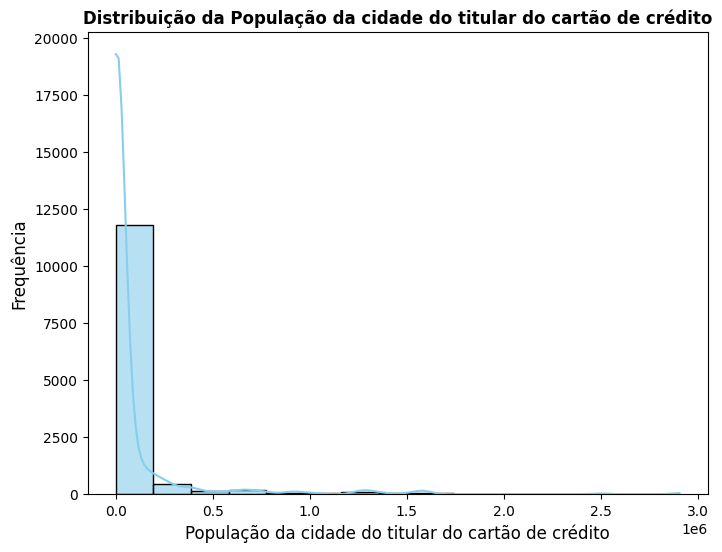

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['city_pop'], 
    kde=True, 
    color='skyblue', 
    bins=15, 
    alpha=0.6
)

plt.title('Distribuição da População da cidade do titular do cartão de crédito', fontsize=12, weight='bold')
plt.xlabel('População da cidade do titular do cartão de crédito', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

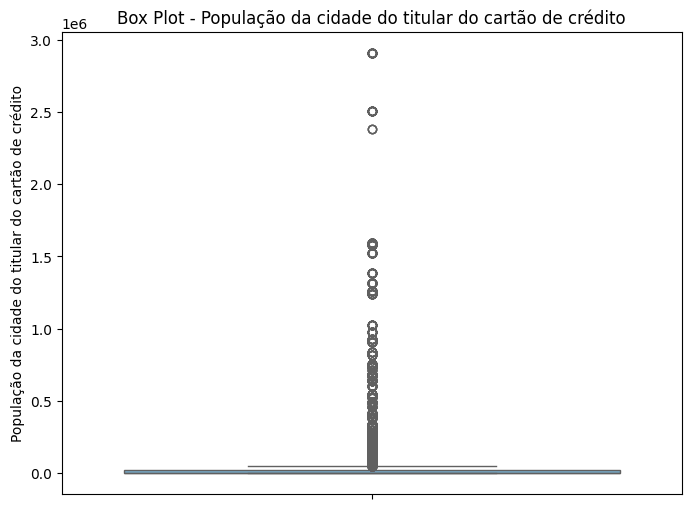

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    y='city_pop',
    color='#6BAED6'
)
plt.title('Box Plot - População da cidade do titular do cartão de crédito')
plt.ylabel('População da cidade do titular do cartão de crédito')
plt.show()

In [16]:
count = df[df['city_pop'] < 100000].shape[0]
print(f"Percentual de cidades com população menor que 100.000 de habitantes: {(count/df.shape[0]*100):.2f}%")

count = df[(df['city_pop'] > 1000000)].shape[0]
print(f"Percentual de cidades com população maior que 1.000.000 de habitantes: {(count/df.shape[0]*100):.2f}%")

Percentual de cidades com população menor que 100.000 de habitantes: 86.43%
Percentual de cidades com população maior que 1.000.000 de habitantes: 2.34%


**Transformação Logarítmica + padronização**

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df['city_pop_log'] = np.log1p(df['city_pop'])

scaler = StandardScaler()
df['city_pop_scaled'] = scaler.fit_transform(df[['city_pop_log']])
#df

**Conclusões**:
- A análise descritiva das principais métricas estatísticas da feature `população da cidade do titular do cartão de crédito`, combinada com o histograma e o boxplot, revela que sua distribuição também é fortemente assimétrica à direita. Isso indica que a maioria das cidades tem população relativamente baixa, enquanto uma minoria concentra populações muito elevadas.
- Algumas informações importantes devem ser destacadas:
    - `25%` das cidades possuem população inferior a `743` habitantes
    - `86,21%` das cidades têm menos de `100.000` habitantes
    - `Menos de 3%` das cidades apresentam população `superior a 1.000.000` habitantes
- Por conta dessa forte assimetria, foram aplicadas as seguintes transformações na feature `população da cidade do titular do cartão de crédito`:
    1. `Transformação logarítmica`.
    2. `Padronização (StandardScaler)`.

#### **1.3.4. Demais features numéricas (`lat`, `long`, `merch_lat`, `merch_long`)**

As demais features numéricas correspondem às cordenadas geográficas de localização do titular do cartão de crédito (`lat` e `long`) e do comerciante (`merch_lat`  `merch_long`). Essas variáveis foram analisadas por meio de histogramas e boxplots, com o objetivo de compreender suas distribuições e avaliar a necessidade de eventuais transformações.

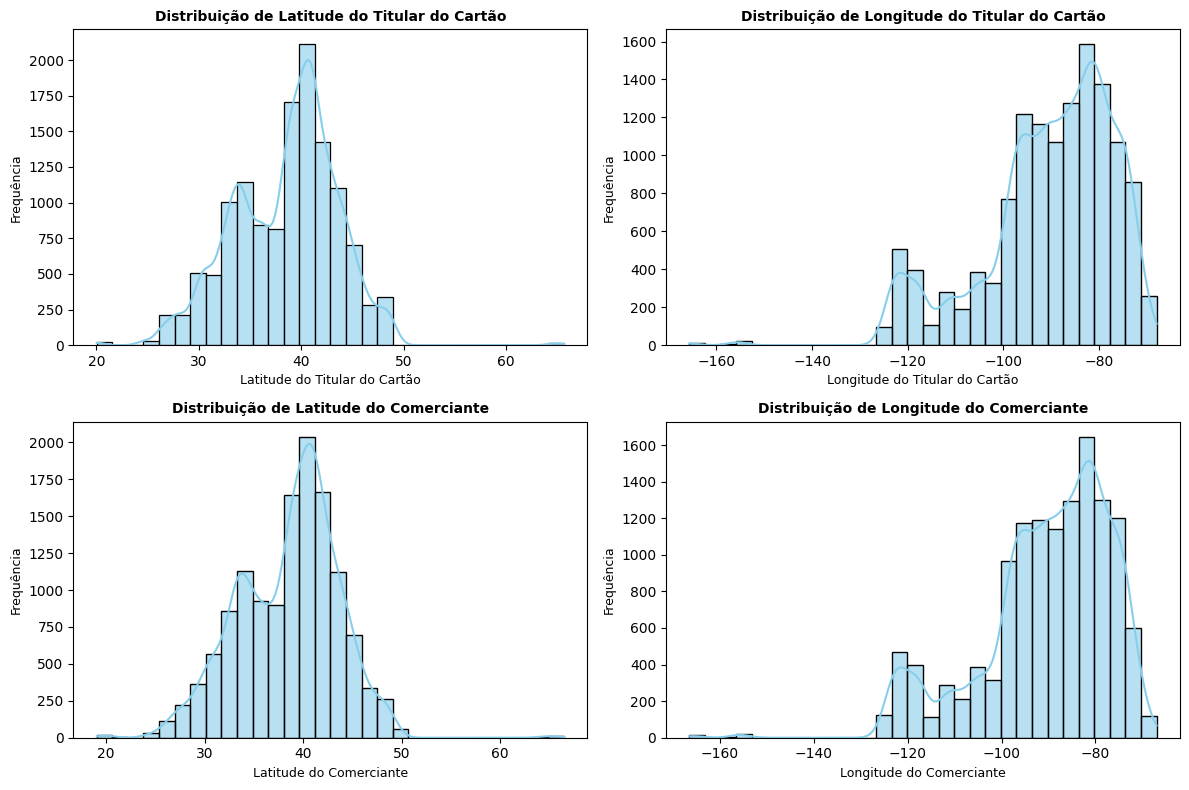

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['lat', 'long', 'merch_lat', 'merch_long']
titles = [
    'Latitude do Titular do Cartão',
    'Longitude do Titular do Cartão',
    'Latitude do Comerciante',
    'Longitude do Comerciante'
]

n_features = len(features)
rows = 2
cols = 2

plt.figure(figsize=(12, 8))

for idx, feature in enumerate(features, 1):
    plt.subplot(rows, cols, idx)
    sns.histplot(
        df[feature], 
        kde=True, 
        color='skyblue', 
        bins=30, 
        alpha=0.6
    )
    plt.title(f'Distribuição de {titles[idx - 1]}', fontsize=10, weight='bold')
    plt.xlabel(titles[idx - 1], fontsize=9)
    plt.ylabel('Frequência', fontsize=9)
    plt.tight_layout()

plt.show()



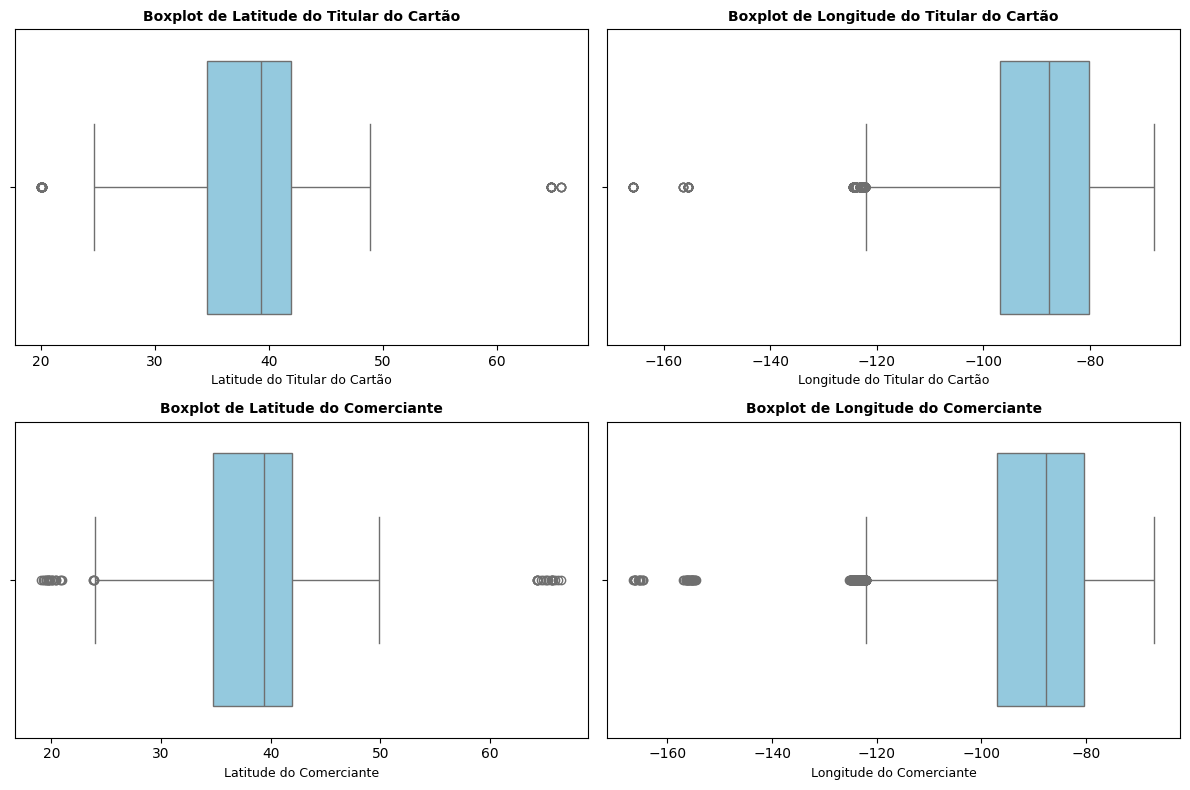

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['lat', 'long', 'merch_lat', 'merch_long']
titles = [
    'Latitude do Titular do Cartão',
    'Longitude do Titular do Cartão',
    'Latitude do Comerciante',
    'Longitude do Comerciante'
]

n_features = len(features)
rows = 2
cols = 2

plt.figure(figsize=(12, 8))

for idx, feature in enumerate(features, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(
        x=df[feature], 
        color='skyblue'
    )
    plt.title(f'Boxplot de {titles[idx - 1]}', fontsize=10, weight='bold')
    plt.xlabel(titles[idx - 1], fontsize=9)
    plt.tight_layout()

plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
coords = ['lat', 'long', 'merch_lat', 'merch_long']


scaled_values = scaler.fit_transform(df[coords])

# Cria novas colunas com sufixo '_scaled'
for i, col in enumerate(coords):
    df[f'{col}_scaled'] = scaled_values[:, i]

# Removendo as colunas originais
#df.drop(columns=coords, inplace=True)

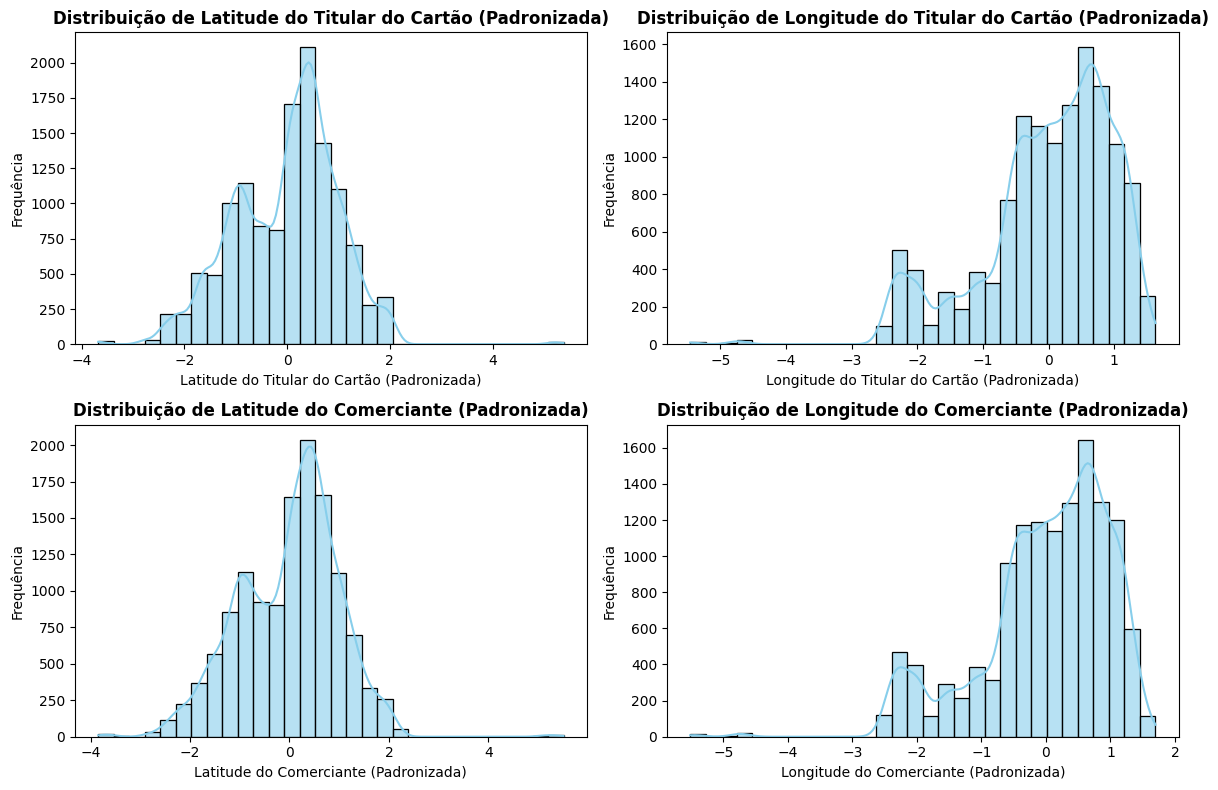

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['lat_scaled', 'long_scaled', 'merch_lat_scaled', 'merch_long_scaled']
titles = [
    'Latitude do Titular do Cartão (Padronizada)',
    'Longitude do Titular do Cartão (Padronizada)',
    'Latitude do Comerciante (Padronizada)',
    'Longitude do Comerciante (Padronizada)'
]

n_features = len(features)
rows = 2
cols = 2

plt.figure(figsize=(12, 8))

for idx, feature in enumerate(features, 1):
    plt.subplot(rows, cols, idx)
    sns.histplot(
        df[feature], 
        kde=True, 
        color='skyblue', 
        bins=30,   
        alpha=0.6
    )
    plt.title(f'Distribuição de {titles[idx - 1]}', fontsize=12, weight='bold')
    plt.xlabel(titles[idx - 1], fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    
plt.tight_layout()
plt.show()


**Conclusões**:
- As distribuições das variáveis geográficas não apresentam o mesmo grau de assimetria observado nas features `valor da transação` (`amt`) e `população da cidade do titular do cartão` (`city_pop`). Por esse motivo, a aplicação de transformação logarítmica não se mostrou necessária neste caso.
- Em relação à latitude, foram identificados poucos outliers no boxplot, localizados abaixo de 20° e acima de 60°. Já para a longitude, observou-se uma pequena quantidade de valores extremos próximos a -160°, também considerados outliers.
- Diante disso, optou-se por aplicar apenas a padronização (standardização) nas variáveis `lat`, `long`, `merch_lat` e `merch_long`, garantindo que todas apresentem a mesma escala, o que é extremamente importante para algoritmos sensíveis à distância, como `K-Means` e `DBSCAN`.

### **1.4. Features Categóricas Nominais**

Foi realizada uma análise exploratória das distribuições de frequência para os atributos categóricos listados a seguir.

In [22]:
features_categoricas = ['gender', 'job', 'category']

exibe_qtd_por_feature_categorica(df, features_categoricas)

Coluna: gender
gender
F    7041
M    5925
Name: count, dtype: int64
----------------------------------------
Coluna: job
job
Film/video editor                  91
Financial adviser                  90
Materials engineer                 87
Scientist, audiological            86
Designer, ceramics/pottery         86
                                   ..
Solicitor, Scotland                 1
Buyer, retail                       1
Accountant, chartered certified     1
Careers adviser                     1
Veterinary surgeon                  1
Name: count, Length: 478, dtype: int64
----------------------------------------
Coluna: category
category
gas_transport     1311
grocery_pos       1248
home              1227
shopping_pos      1131
kids_pets         1118
shopping_net      1013
personal_care      943
food_dining        892
entertainment      867
health_fitness     853
misc_pos           850
misc_net           641
grocery_net        454
travel             418
Name: count, dtype: int64
---

#### **1.4.1. Gênero do titular do cartão de crédito (`gender`)**

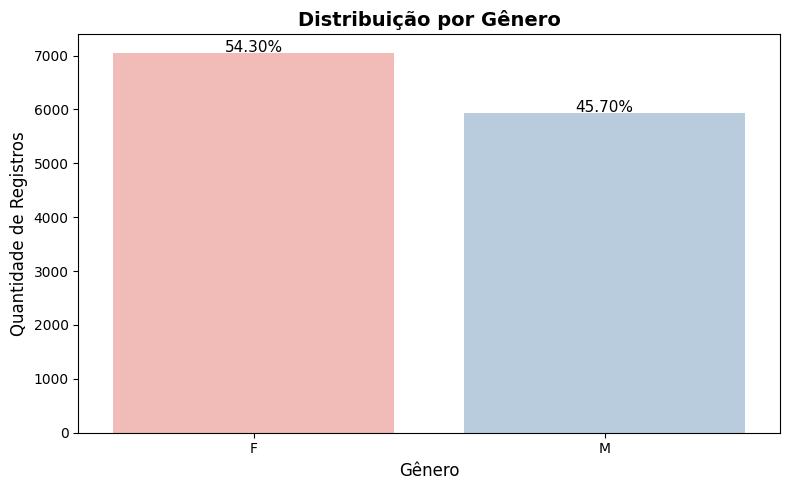

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_counts = df['gender'].value_counts()
total = gender_counts.sum()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=gender_counts.index, 
    y=gender_counts.values, 
    hue=gender_counts.index, 
    palette='Pastel1', 
    dodge=False, 
    legend=False
)

plt.title('Distribuição por Gênero', fontsize=14, weight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Registros', fontsize=12)

# Exibir o percentual no topo das barras
for idx, value in enumerate(gender_counts.values):
    percent = (value / total) * 100
    plt.text(idx, value + 30, f'{percent:.2f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


**Binary Encoding + Padronização**

In [24]:
df['gender_encoded'] = df['gender'].map({'F': 0, 'M': 1})

scaler = StandardScaler()
df['gender_encoded_scaled'] = scaler.fit_transform(df[['gender_encoded']])

df[['gender', 'gender_encoded', 'gender_encoded_scaled']].head()


,gender,gender_encoded,gender_encoded_scaled
9638,F,0,-0.917333
930366,F,0,-0.917333
980179,F,0,-0.917333
27076,F,0,-0.917333
1042997,F,0,-0.917333


**Conclusão**:
- A feature `gênero do titular do cartão de crédito` apresenta uma leve predominância de transações associadas ao gênero feminino, que representam aproximadamente `55% do total`.
- O uso de atributos sensíveis, como `gênero`, `idade` e `etnia`, deve ser avaliado com cuidado, pois pode levar a decisões enviesadas em aplicações futuras.
- Embora a feature não seja removida neste momento, serão realizados experimentos de clusterização com e sem a variável, com o objetivo de avaliar seu impacto na formação dos grupos e verificar se ela introduz algum tipo de viés indesejado.
- Para viabilizar seu uso nos algoritmos de clusterização, foi aplicada a técnica de `codificação binária` (`Binary Encoding`), atribuindo o valor `0` para o gênero feminino e `1` para o masculino. Em seguida, a variável foi `padronizada` para garantir compatibilidade com os algoritmos baseados em distância.

#### **1.4.2. Cargo do titular do cartão de crédito (`job`)**

In [25]:
job_counts = df['job'].value_counts()

print("Total de cargos:")
print(job_counts.shape[0])

print("\nTop 30 Cargos com Mais Transações:")
print(job_counts.head(30))

print("\n0 Cargos com Menos Transações:")
print(job_counts.tail(30))


Total de cargos:
478

Top 30 Cargos com Mais Transações:
job
Film/video editor                      91
Financial adviser                      90
Materials engineer                     87
Designer, ceramics/pottery             86
Scientist, audiological                86
Systems developer                      83
Surveyor, land/geomatics               83
Naval architect                        83
Audiological scientist                 80
Exhibition designer                    76
Podiatrist                             76
Sub                                    73
Agricultural consultant                72
Chief Executive Officer                72
Immunologist                           72
Chartered public finance accountant    72
Librarian, public                      71
IT trainer                             71
Mining engineer                        68
Water engineer                         66
Environmental consultant               66
Engineer, automotive                   66
Quantity survey

**Aplica Frequency Encoding + Padronização**

In [26]:
from sklearn.preprocessing import StandardScaler

job_freq = df['job'].value_counts(normalize=True)

df['job_freq_encoded'] = df['job'].map(job_freq)

scaler = StandardScaler()
df['job_freq_scaled'] = scaler.fit_transform(df[['job_freq_encoded']])

print(df[['job', 'job_freq_encoded', 'job_freq_scaled']].head())


                                 job  job_freq_encoded  job_freq_scaled
9638       Claims inspector/assessor          0.004396         0.831789
930366   Community education officer          0.001620        -0.930478
980179               Charity officer          0.000617        -1.566852
27076                     Podiatrist          0.005861         1.761874
1042997   Regulatory affairs officer          0.003008        -0.049344


**Conclusão**:
- Considerando que essa feature possui alta cardinalidade (`494` cargos diferentes) e natureza categórica, inicialmente foi avaliada a possibilidade de agrupamento em categorias como "`Baixa`", "`Média`" e "`Alta`" atividade, com base no volume de transações. No entanto, essa abordagem implicaria na perda de granularidade, o que poderia comprometer a identificação de padrões relevantes, especialmente no contexto de detecção de fraudes.
- Por esse motivo, foi aplicada a técnica de `Frequency Encoding`, que substitui a variável categórica pelo percentual de transações associadas a cada cargo. Essa transformação permite que o modelo capture a importância estatística da feature sem aumentar a dimensionalidade dos dados, como ocorreria com técnicas como `One-Hot Encoding`.

#### **1.4.3. Categoria do comerciante (`category`)**

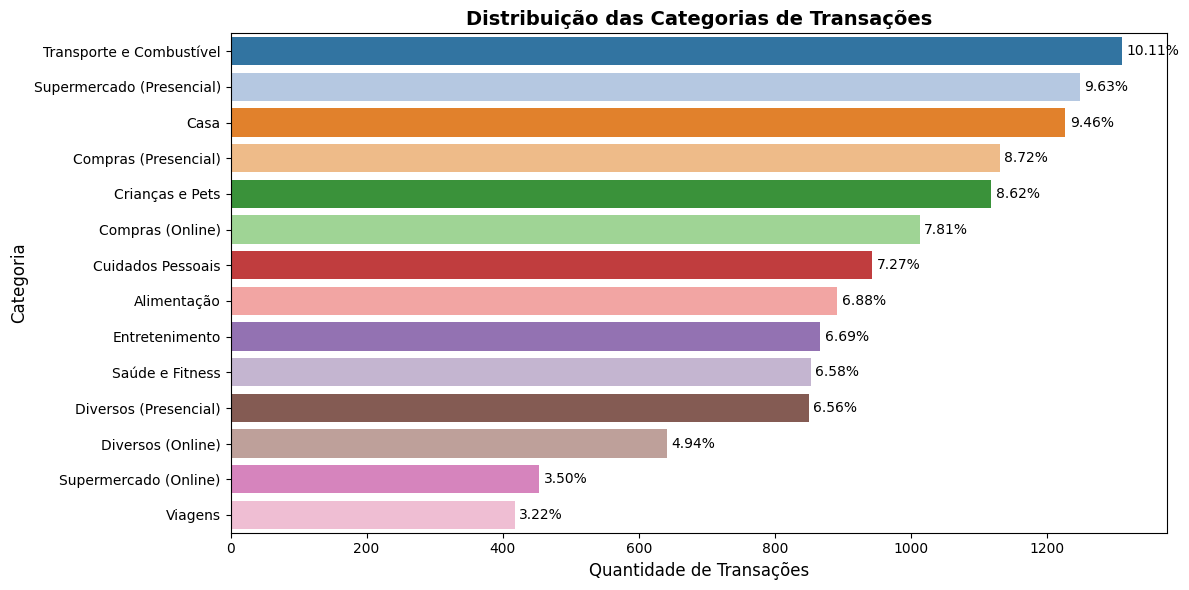

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df['category'].value_counts()
total = category_counts.sum()

category_translation = {
    'gas_transport': 'Transporte e Combustível',
    'grocery_pos': 'Supermercado (Presencial)',
    'home': 'Casa',
    'shopping_pos': 'Compras (Presencial)',
    'kids_pets': 'Crianças e Pets',
    'shopping_net': 'Compras (Online)',
    'entertainment': 'Entretenimento',
    'food_dining': 'Alimentação',
    'personal_care': 'Cuidados Pessoais',
    'health_fitness': 'Saúde e Fitness',
    'misc_pos': 'Diversos (Presencial)',
    'misc_net': 'Diversos (Online)',
    'grocery_net': 'Supermercado (Online)',
    'travel': 'Viagens'
}

translated_categories = [category_translation.get(cat, cat) for cat in category_counts.index]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=category_counts.values, 
    y=translated_categories, 
    hue=category_counts.index,
    palette=sns.color_palette('tab20', len(category_counts)), 
    dodge=False, 
    legend=False
)

# Adicionando os percentuais na ponta da barra
for index, value in enumerate(category_counts.values):
    percent = (value / total) * 100
    plt.text(
        value + total * 0.0005,  # Pequeno deslocamento para não colar na barra
        index, 
        f'{percent:.2f}%', 
        va='center', 
        fontsize=10
    )

plt.title('Distribuição das Categorias de Transações', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Transações', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [28]:
#Percentual de compras online

total_transacoes = df.shape[0]

transacoes_online = df['category'].str.contains('_net').sum()

percentual_online = (transacoes_online / total_transacoes) * 100

print(f"Percentual de transações online: {percentual_online:.2f}%")

Percentual de transações online: 16.26%


**Aplica Frequency Encoding + Padronização**

In [29]:
from sklearn.preprocessing import StandardScaler

category_freq = df['category'].value_counts(normalize=True)

df['category_freq_encoded'] = df['category'].map(category_freq)

scaler = StandardScaler()
df['category_freq_scaled'] = scaler.fit_transform(df[['category_freq_encoded']])

print(df[['category', 'category_freq_encoded', 'category_freq_scaled']].head())

               category  category_freq_encoded  category_freq_scaled
9638     health_fitness               0.065787             -0.636621
930366      food_dining               0.068795             -0.471992
980179             home               0.094632              0.942130
27076     entertainment               0.066867             -0.577523
1042997   personal_care               0.072729             -0.256708


**Conclusão**:
- Com relação à feature Categoria do Comerciante (`category`), observou-se que as transações online, representadas pelas categorias **Compras (Online)**, **Diversos (Online)** e **Supermercado (Online)**, correspondem aproximadamente  `15,91% do total de transações`. 
    - Esse fato é bastante relevante no contexto da detecção de fraudes, já que transações online tendem a ser mais vulneráveis a atividades fraudulentas.
    - No entanto, essa hipótese deve ser validada a partir dos dados. Após a etapa de clusterização, será possível analisar se os grupos com maior concentração de transações online apresentam padrões mais suspeitos, contribuindo para a validação ou rejeição dessa premissa.
- Para o tratamento da variável, foi aplicada a técnica de `Frequency Encoding`, que substitui a variável categórica pelo percentual de transações associadas a cada categoria de comerciante. 

#### **1.4.4. Primeiro (`first`) e último (`last`) nome do titular do cartão de crédito**

In [30]:
df['full_name'] = df['first'].str.strip() + ' ' + df['last'].str.strip()

df['freq_nome_completo'] = df.groupby(['full_name'])['full_name'].transform('count')

num_clientes_nome = df[['full_name']].drop_duplicates().shape[0]
print(f"Clientes únicos por nome completo: {num_clientes_nome}")


num_clientes_nome_data_nascimento = df[['full_name',  'dob']].drop_duplicates().shape[0]
print(f"Clientes únicos por nome + data nascimento: {num_clientes_nome_data_nascimento}")

Clientes únicos por nome completo: 910
Clientes únicos por nome + data nascimento: 917


**Aplica Frequency Encoding + Padronização**

In [31]:
full_name_freq = df['full_name'].value_counts(normalize=True)
df['full_name_freq_encoded'] = df['full_name'].map(full_name_freq)

scaler = StandardScaler()
df['full_name_freq_scaled'] = scaler.fit_transform(df[['full_name_freq_encoded']])

print(df[['full_name', 'full_name_freq_encoded', 'full_name_freq_scaled']].head())

               full_name  full_name_freq_encoded  full_name_freq_scaled
9638     Veronica Burton                0.000771              -1.058529
930366    Melissa Krause                0.001620               0.197764
980179    Kathleen Heath                0.000617              -1.286947
27076      Angela Taylor                0.002159               0.997224
1042997     Carol Dillon                0.003008               2.253517


**Conclusões**:
- Foram identificadas 973 combinações únicas de primeiro e último nome. Quando a data de nascimento (`dob`) é é considerada em conjunto, esse número aumenta para 983 combinações únicas. Esse pequeno acréscimo reforça que, isoladamente, os nomes não são identificadores confiáveis, uma vez que diferentes indivíduos podem compartilhar o mesmo nome completo.
- No entanto, apesar de não serem suficientes para identificação única dos clientes, os nomes ainda podem conter informações relevantes sobre padrões de comportamento. Por esse motivo, foi criada uma nova feature consolidada (`full_name`), unindo o primeiro e o último nome em uma única feature, permitindo capturar melhor a frequência de ocorrência dos nomes na base.
    - Sobre essa nova feature, foi aplicada a técnica de `Frequency Encoding`, transformando os nomes em uma medida estatística representativa da sua frequência. Em seguida, a feature foi `padronizada` (média 0, desvio padrão 1), garantindo que estivesse na mesma escala das demais variáveis

#### **1.4.5. Nome do comerciante (`merchant`)**

In [32]:
df['freq_merchant'] = df.groupby(['merchant'])['merchant'].transform('count')

num_merchant = df[['merchant']].drop_duplicates().shape[0]
print(f"Comerciantes únicos por nome completo: {num_merchant}")


num_merchant_nome_localizacao = df[['merchant', 'merch_lat', 'merch_long']].drop_duplicates().shape[0]
print(f"Comerciantes únicos por nome + localização: {num_merchant_nome_localizacao}")


Comerciantes únicos por nome completo: 693
Comerciantes únicos por nome + localização: 12966


In [33]:
merchant_freq = df['merchant'].value_counts(normalize=True)
df['merchant_freq_encoded'] = df['merchant'].map(merchant_freq)

scaler = StandardScaler()
df['merchant_freq_scaled'] = scaler.fit_transform(df[['merchant_freq_encoded']])

print(df[['merchant', 'merchant_freq_encoded', 'merchant_freq_scaled']].head())

                                    merchant  merchant_freq_encoded  \
9638                    fraud_Ziemann-Waters               0.001465   
930366               fraud_Powlowski-Weimann               0.001311   
980179   fraud_Hettinger, McCullough and Fay               0.001465   
27076                   fraud_Morissette LLC               0.001542   
1042997                    fraud_Bins-Howell               0.002005   

         merchant_freq_scaled  
9638                -0.347998  
930366              -0.639424  
980179              -0.347998  
27076               -0.202285  
1042997              0.671992  


**Conclusão**:
- Embora existam apenas 693 nomes únicos de comerciantes na base de dados, observou-se que há uma combinação única de nome e localização (latitude `merch_lat` e longitude `merch_long`) para praticamente cada uma das 1.296.675 transações. Esse padrão sugere que as coordenadas geográficas associadas aos comerciantes não são consistentes para representar sua localização real.
    - Diante disso, optou-se por não utilizar diretamente as coordenadas geográficas do comerciante.
- Para preservar a informação relevante associada ao comerciante, foi aplicada a técnica de `Frequency Encoding` sobre a feature `merchant`. Em seguida, a feature foi `padronizada` para garantir que estivesse na mesma escala das demais features utilizadas nos algoritmos de clusterização.

#### **1.4.6. Número do cartão de crédito do cliente (`cc_num`)**

In [34]:
num_cartao_client = df[['cc_num']].drop_duplicates().shape[0]
print(f"Número do cartão de crédito do cliente únicos: {num_cartao_client}")

num_cartao_client_full_name_dob = df[['cc_num', 'full_name', 'dob']].drop_duplicates().shape[0]
print(f"Número do cartão de crédito do cliente + nome completo + data de nascimento: {num_cartao_client_full_name_dob}")



Número do cartão de crédito do cliente únicos: 917
Número do cartão de crédito do cliente + nome completo + data de nascimento: 917


In [35]:
cc_num_freq = df['cc_num'].value_counts(normalize=True)
df['cc_num_freq_encoded'] = df['cc_num'].map(cc_num_freq)

scaler = StandardScaler()
df['cc_num_freq_scaled'] = scaler.fit_transform(df[['cc_num_freq_encoded']])

print(df[['cc_num', 'cc_num_freq_encoded', 'cc_num_freq_scaled']].head())

                      cc_num  cc_num_freq_encoded  cc_num_freq_scaled
9638          38544312728630             0.000771           -1.071534
930366         4640395708703             0.001620            0.230110
980179      2288748891690227             0.000617           -1.308196
27076    4560395181594436016             0.002159            1.058428
1042997      345933964507467             0.003008            2.360072


**Conclusão**:
- Existem exatamente 983 números de cartão únicos, o mesmo número de combinações exclusivas envolvendo número do cartão (`cc_num`) + nome completo (`full_name`) + data de nascimento (`dob`).
- Esse resultado confirma que cada número de cartão está vinculado a um único cliente, caracterizando a feature `cc_num` como um identificador confiável e exclusivo do cliente.
- Diante desse cenário, adotaram-se as seguintes decisões para a modelagem:
    - A variável `full_name_freq_scaled` — derivada do nome do cliente após aplicação de `Frequency Encoding` e `padronização` — não será utilizada, pois o nome apresenta duplicidades e, portanto, não representa de forma consistente a identidade de um único cliente.
    - Em contrapartida, a variável derivada de `cc_num`, também transformada por `Frequency Encoding` e `padronização`, será mantida na modelagem por representar de forma mais precisa o comportamento individual dos clientes ao longo do tempo.

#### **1.4.7. Número da transação (`trans_num`)**

In [36]:
num_trans = df[['trans_num']].drop_duplicates().shape[0]
print(f"Números de transações únicas: {num_trans}")

Números de transações únicas: 12966


**Conclusão**:
- Cada transação do dataset possui um identificador único, representado pela variável número da transação. Por se tratar de um valor exclusivo para cada registro e não conter informação útil para agrupamento ou generalização, essa feature não será utilizada na modelagem.

#### **1.4.8. Variáveis de Endereço**

As seguintes informações de endereço do titular do cartão de crédito foram removidas do dataset, uma vez que as variáveis de latitude (`lat`) e da longitude (`long`) já são suficientes para representar a localização geográfica do cliente com maior precisão:
- `street`: Endereço do titular do cartão de crédito
- `city`: Cidade do titular do cartão de crédito
- `state`: Estado do titular do cartão de crédito
- `zip`: Código postal do titular do cartão de crédito

In [37]:
df.drop(columns=['street', 'city', 'state', 'zip'], inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,lat,long,...,category_freq_scaled,full_name,freq_nome_completo,full_name_freq_encoded,full_name_freq_scaled,freq_merchant,merchant_freq_encoded,merchant_freq_scaled,cc_num_freq_encoded,cc_num_freq_scaled
9638,2019-01-06 23:35:09,38544312728630,fraud_Ziemann-Waters,health_fitness,78.61,Veronica,Burton,F,26.3771,-81.7334,...,-0.636621,Veronica Burton,10,0.000771,-1.058529,19,0.001465,-0.347998,0.000771,-1.071534
930366,2020-01-04 18:16:23,4640395708703,fraud_Powlowski-Weimann,food_dining,26.46,Melissa,Krause,F,30.6576,-91.6264,...,-0.471992,Melissa Krause,21,0.001620,0.197764,17,0.001311,-0.639424,0.001620,0.230110
980179,2020-02-02 12:49:41,2288748891690227,"fraud_Hettinger, McCullough and Fay",home,18.60,Kathleen,Heath,F,35.0561,-106.5506,...,0.942130,Kathleen Heath,8,0.000617,-1.286947,19,0.001465,-0.347998,0.000617,-1.308196
27076,2019-01-16 13:12:24,4560395181594436016,fraud_Morissette LLC,entertainment,25.29,Angela,Taylor,F,39.0470,-122.9328,...,-0.577523,Angela Taylor,28,0.002159,0.997224,20,0.001542,-0.202285,0.002159,1.058428
1042997,2020-03-08 21:04:59,345933964507467,fraud_Bins-Howell,personal_care,38.77,Carol,Dillon,F,38.4121,-75.2811,...,-0.256708,Carol Dillon,39,0.003008,2.253517,26,0.002005,0.671992,0.003008,2.360072


### **1.5. Features Temporais**

#### **1.5.1. Hora da transação no UNIX (`unix_time`)**

A análise das features data e hora da transação (`trans_date_trans_time`) e hora da transação no UNIX (`unix_time`) revelou que ambas representam a mesma informação relativa ao horário da transação.

No entanto, a feature `trans_date_trans_time` também apresenta outros componentes temporais como dia, mês e ano, além do horário.

In [38]:
import pandas as pd

df_temp = df.copy()  

df_temp['unix_time_converted'] = pd.to_datetime(df_temp['unix_time'], unit='s')
df_temp['trans_date_trans_time'] = pd.to_datetime(df_temp['trans_date_trans_time'])

df_temp['same_time'] = (
    (df_temp['trans_date_trans_time'].dt.hour == df_temp['unix_time_converted'].dt.hour) &
    (df_temp['trans_date_trans_time'].dt.minute == df_temp['unix_time_converted'].dt.minute) &
    (df_temp['trans_date_trans_time'].dt.second == df_temp['unix_time_converted'].dt.second)
)

print(df_temp[['trans_date_trans_time', 'unix_time', 'unix_time_converted', 'same_time']].head(10))

percentual_same_time = df_temp['same_time'].mean() * 100
print(f"Percentual de transações com as features 'trans_date_trans_time' e 'unix_time' apresentando a mesma hora, minuto e segundo: {percentual_same_time:.2f}%")


        trans_date_trans_time   unix_time unix_time_converted  same_time
9638      2019-01-06 23:35:09  1325892909 2012-01-06 23:35:09       True
930366    2020-01-04 18:16:23  1357323383 2013-01-04 18:16:23       True
980179    2020-02-02 12:49:41  1359809381 2013-02-02 12:49:41       True
27076     2019-01-16 13:12:24  1326719544 2012-01-16 13:12:24       True
1042997   2020-03-08 21:04:59  1362776699 2013-03-08 21:04:59       True
494167    2019-08-03 20:49:45  1344026985 2012-08-03 20:49:45       True
109621    2019-03-03 21:44:42  1330811082 2012-03-03 21:44:42       True
233257    2019-04-27 21:37:24  1335562644 2012-04-27 21:37:24       True
497413    2019-08-04 17:38:51  1344101931 2012-08-04 17:38:51       True
973684    2020-01-29 14:43:39  1359470619 2013-01-29 14:43:39       True
Percentual de transações com as features 'trans_date_trans_time' e 'unix_time' apresentando a mesma hora, minuto e segundo: 100.00%


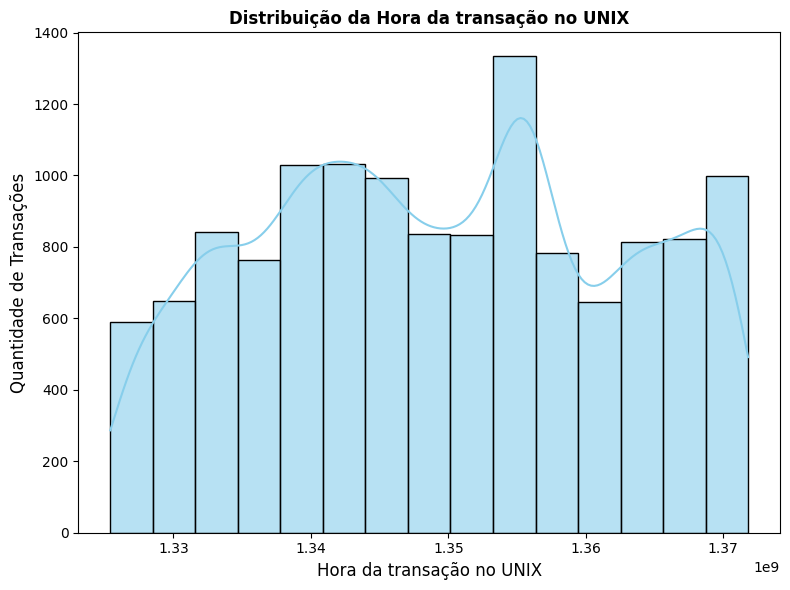

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['unix_time'], 
    kde=True, 
    color='skyblue', 
    bins=15, 
    alpha=0.6
)

plt.title('Distribuição da Hora da transação no UNIX', fontsize=12, weight='bold')
plt.xlabel('Hora da transação no UNIX', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

plt.tight_layout()
plt.show()

In [40]:
scaler = StandardScaler()
df['unix_time_scaled'] = scaler.fit_transform(df[['unix_time']])

print(df[['unix_time', 'unix_time_scaled']].head())

# df.drop(columns=['unix_time'], inplace=True)
# df.head()

          unix_time  unix_time_scaled
9638     1325892909         -1.831134
930366   1357323383          0.624286
980179   1359809381          0.818498
27076    1326719544         -1.766555
1042997  1362776699          1.050311


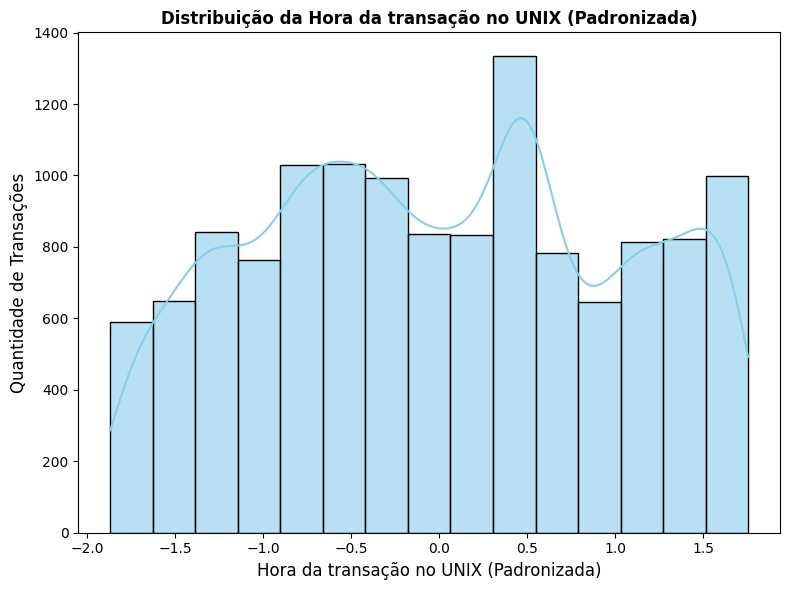

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['unix_time_scaled'], 
    kde=True, 
    color='skyblue', 
    bins=15, 
    alpha=0.6
)

plt.title('Distribuição da Hora da transação no UNIX (Padronizada)', fontsize=12, weight='bold')
plt.xlabel('Hora da transação no UNIX (Padronizada)', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

plt.tight_layout()
plt.show()

#### **1.5.2. Data de nascimento do titular do cartão de crédito (`dob`)**

A variável `dob`, que representa a data de nascimento do titular do cartão de crédito, será utilizada em conjunto com a variável `trans_date_trans_time` (data e hora da transação) para obter a idade do titular do cartão no momento da transação, gerando a nova feature `age`. Essa transformação permite acrescentar uma informação mais relevante e  interpretável no modelo.

In [42]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

print(df[['trans_date_trans_time', 'dob', 'age']].head())

        trans_date_trans_time        dob  age
9638      2019-01-06 23:35:09 1991-08-21   27
930366    2020-01-04 18:16:23 1951-06-13   68
980179    2020-02-02 12:49:41 1967-01-24   53
27076     2019-01-16 13:12:24 1972-10-18   46
1042997   2020-03-08 21:04:59 1985-03-19   34


In [43]:
feature_idade_transacao = df['age']

metrics = {
    'mean': feature_idade_transacao.mean(),
    'std': feature_idade_transacao.std(),
    'q1': feature_idade_transacao.quantile(0.25),
    'median': feature_idade_transacao.median(),
    'q3': feature_idade_transacao.quantile(0.75),
    'mode': feature_idade_transacao.mode().tolist(),
    'min': feature_idade_transacao.min(),
    'max': feature_idade_transacao.max(),
    'nulls': feature_idade_transacao.isnull().sum()
}

print("Métricas para a variável Idade do titular do cartão de crédito no momento da transação ('idade_transacao'):")
print(f"Média: {metrics['mean']}")
print(f"Desvio Padrão: {metrics['std']}")
print(f"Q1: {metrics['q1']}")
print(f"Mediana: {metrics['median']}")
print(f"Q3: {metrics['q3']}")
print(f"Moda: {metrics['mode']}")
print(f"Valor mínimo: {metrics['min']}")
print(f"Valor máximo: {metrics['max']}")
print(f"Valores nulos: {metrics['nulls']}")

Métricas para a variável Idade do titular do cartão de crédito no momento da transação ('idade_transacao'):
Média: 45.66057380842203
Desvio Padrão: 17.240588316132833
Q1: 32.0
Mediana: 44.0
Q3: 57.0
Moda: [47]
Valor mínimo: 14
Valor máximo: 95
Valores nulos: 0


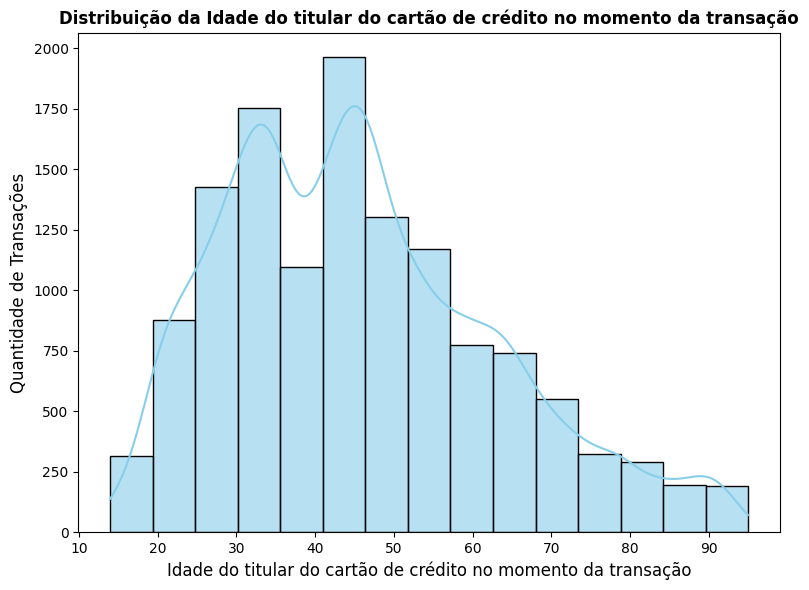

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['age'], 
    kde=True, 
    color='skyblue', 
    bins=15, 
    alpha=0.6
)

plt.title('Distribuição da Idade do titular do cartão de crédito no momento da transação', fontsize=12, weight='bold')
plt.xlabel('Idade do titular do cartão de crédito no momento da transação', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

plt.tight_layout()
plt.show()

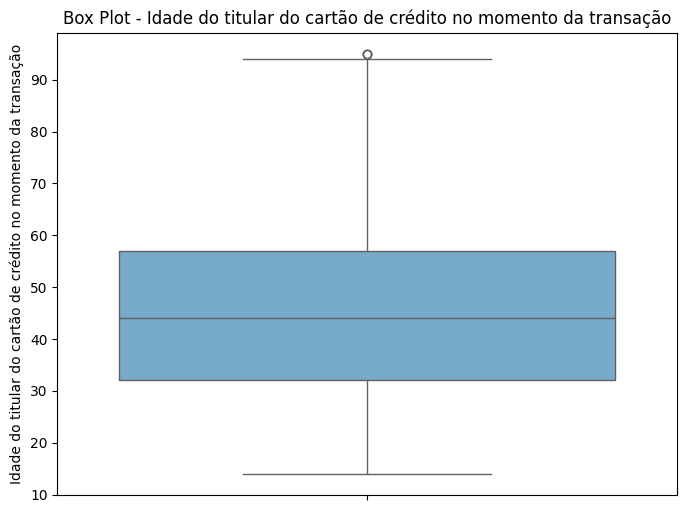

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    y='age',
    color='#6BAED6'
)
plt.title('Box Plot - Idade do titular do cartão de crédito no momento da transação')
plt.ylabel('Idade do titular do cartão de crédito no momento da transação')
plt.show()

In [46]:
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

print(df[['age', 'age_scaled']].head())

         age  age_scaled
9638      27   -1.082405
930366    68    1.295796
980179    53    0.425723
27076     46    0.019688
1042997   34   -0.676370


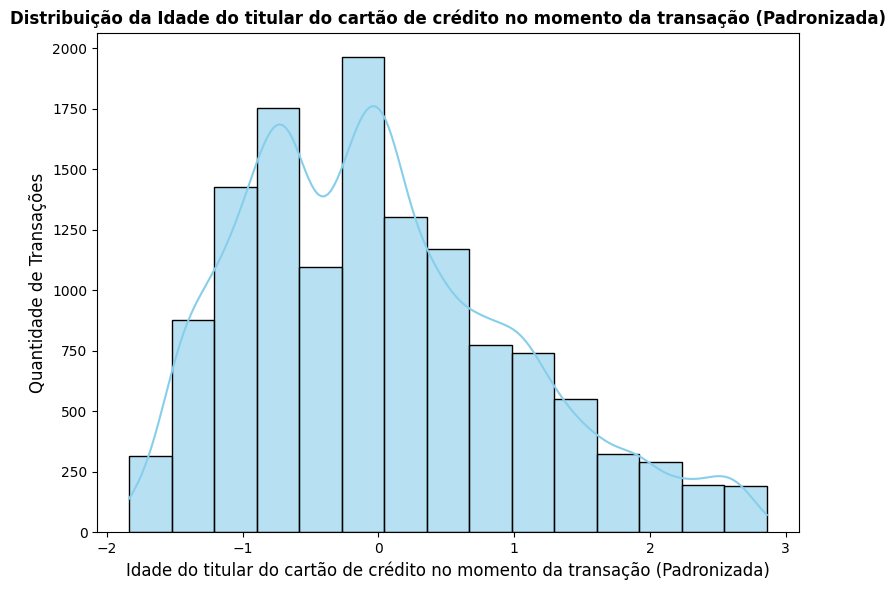

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['age_scaled'], 
    kde=True, 
    color='skyblue', 
    bins=15, 
    alpha=0.6
)

plt.title('Distribuição da Idade do titular do cartão de crédito no momento da transação (Padronizada)', fontsize=12, weight='bold')
plt.xlabel('Idade do titular do cartão de crédito no momento da transação (Padronizada)', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

plt.tight_layout()
plt.show()

**Conclusão**:
- A idade do cliente no momento da transação pode ser uma feature relevante na detecção de padrões anômalos, como idades incompatíveis com o perfil ou com o valor da transação.
- As idades observadas no dataset variaram entre `13 e 95 anos`, com 50% das transações concentradas em clientes entre 32 e 57 anos, conforme indicado pela análise dos quartis.
- Após o cálculo da feature idade (`age`), a mesma foi `padronizada` (com média 0 e desvio padrão 1), garantindo sua compatibilidade com algoritmos baseados em distância.

#### **1.5.3. Data e hora da transação (`trans_date_trans_time`)**

O uso direto de variáveis temporais, como data e hora da transação, não é adequado em modelos de aprendizado de máquina, pois os algoritmos geralmente não conseguem capturar relações temporais ou padrões cíclicos a partir de representações brutas de tempo.

Para extrair informações mais relevantes do momento em que a transação foi realizada, serão geradas novas features derivadas da variável `trans_date_trans_time`:
- **Hora do dia**: fraudes tendem a ocorrer com maior frequência em horários atípicos, como durante a madrugada.
- **Dia da semana**: transações realizadas em finais de semana podem apresentar padrões distintos em relação aos dias úteis.
- **Mês do ano**: pode capturar sazonalidades ou padrões específicos de determinados períodos.

Essas variáveis — `hora do dia`, `dia da semana` e `mês do ano` — possuem características cíclicas. Por exemplo, a hora 23 e a hora 0 são temporalmente próximas, embora numericamente distantes. Por esse motivo, será aplicada uma codificação cíclica, utilizando funções seno e cosseno, para preservar a continuidade e a proximidade entre valores adjacentes no ciclo. Essa abordagem melhora a capacidade dos algoritmos de aprendizado em identificar padrões temporais recorrentes de forma mais precisa.

In [48]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['weekday'] = df['trans_date_trans_time'].dt.weekday
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

print(df[['trans_date_trans_time', 'hour', 'weekday', 'month', 'is_weekend']].head())

        trans_date_trans_time  hour  weekday  month  is_weekend
9638      2019-01-06 23:35:09    23        6      1           1
930366    2020-01-04 18:16:23    18        5      1           1
980179    2020-02-02 12:49:41    12        6      2           1
27076     2019-01-16 13:12:24    13        2      1           0
1042997   2020-03-08 21:04:59    21        6      3           1


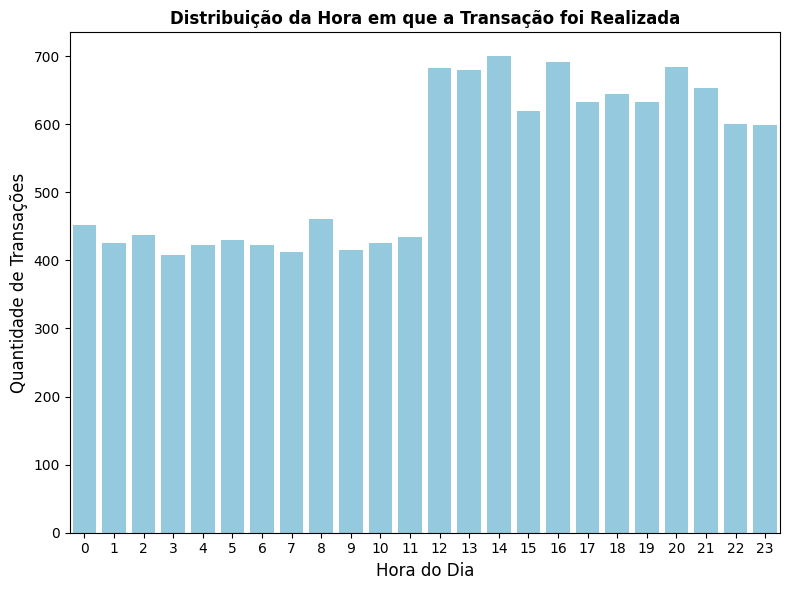

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

hour_counts = df['hour'].value_counts().sort_index()

sns.barplot(
    x=hour_counts.index, 
    y=hour_counts.values, 
    color='skyblue'
)

plt.title('Distribuição da Hora em que a Transação foi Realizada', fontsize=12, weight='bold')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()


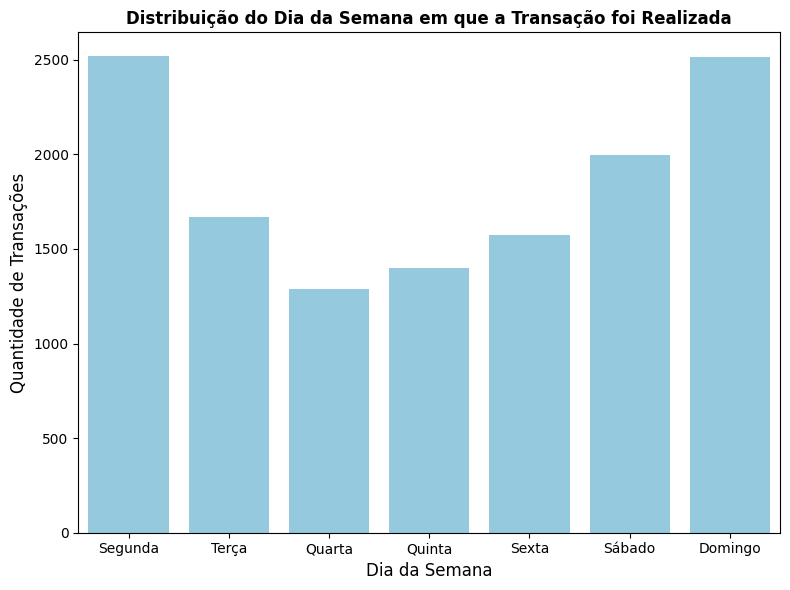

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df['weekday_name'] = df['weekday'].map(dict(enumerate(day_names)))

plt.figure(figsize=(8, 6))

weekday_counts = df['weekday_name'].value_counts().reindex(day_names)

sns.barplot(
    x=weekday_counts.index, 
    y=weekday_counts.values, 
    color='skyblue'
)

plt.title('Distribuição do Dia da Semana em que a Transação foi Realizada', fontsize=12, weight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)

plt.tight_layout()
plt.show()


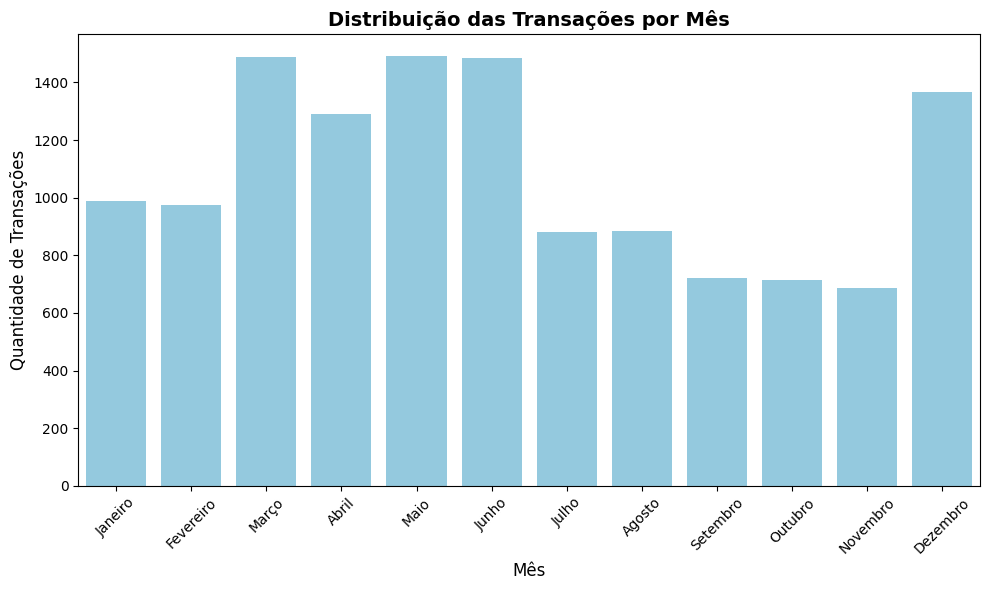

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

month_names = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

df['month_name'] = df['month'].map(dict(enumerate(month_names, start=1)))

plt.figure(figsize=(10, 6))

month_counts = df['month_name'].value_counts().reindex(month_names)

sns.barplot(
    x=month_counts.index, 
    y=month_counts.values, 
    color='skyblue'
)

plt.title('Distribuição das Transações por Mês', fontsize=14, weight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.xticks(rotation=45)  # Inclina os nomes dos meses para melhor visualização

plt.tight_layout()
plt.show()


**Aplica as transformações cíclicas**

In [52]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi), validate=False)


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi), validate=False)

In [53]:
df["hour_sin"] = sin_transformer(24).fit_transform(df[["hour"]])
df["hour_cos"] = cos_transformer(24).fit_transform(df[["hour"]])

df["weekday_sin"] = sin_transformer(7).fit_transform(df[["weekday"]])
df["weekday_cos"] = cos_transformer(7).fit_transform(df[["weekday"]])

df["month_sin"] = sin_transformer(12).fit_transform(df[["month"]])
df["month_cos"] = cos_transformer(12).fit_transform(df[["month"]])


**Padronizar as features `is_weekend`, `hour_sin`, `hour_cos`, `weekday_sin`, `weekday_cos`, `month_sin` e `month_cos`**

In [54]:
scaler = StandardScaler()
df['is_weekend_scaled'] = scaler.fit_transform(df[['is_weekend']])

df['hour_sin_scaled'] = scaler.fit_transform(df[['hour_sin']])
df['hour_cos_scaled'] = scaler.fit_transform(df[['hour_cos']])

df['weekday_sin_scaled'] = scaler.fit_transform(df[['weekday_sin']])
df['weekday_cos_scaled'] = scaler.fit_transform(df[['weekday_cos']])

df['month_sin_scaled'] = scaler.fit_transform(df[['month_sin']])
df['month_cos_scaled'] = scaler.fit_transform(df[['month_cos']])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12966 entries, 9638 to 1225857
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trans_date_trans_time   12966 non-null  datetime64[ns]
 1   cc_num                  12966 non-null  int64         
 2   merchant                12966 non-null  object        
 3   category                12966 non-null  object        
 4   amt                     12966 non-null  float64       
 5   first                   12966 non-null  object        
 6   last                    12966 non-null  object        
 7   gender                  12966 non-null  object        
 8   lat                     12966 non-null  float64       
 9   long                    12966 non-null  float64       
 10  city_pop                12966 non-null  int64         
 11  job                     12966 non-null  object        
 12  dob                     12966 non-null  dateti

In [56]:
cols_to_export = ['amt_scaled', 'city_pop_scaled', 'lat_scaled', 'long_scaled', 'gender_encoded_scaled', 'job_freq_scaled', 'category_freq_scaled', 'merchant_freq_scaled', 'cc_num_freq_scaled', 'age_scaled', 'hour_sin_scaled', 'hour_cos_scaled', 'weekday_sin_scaled', 'weekday_cos_scaled', 'month_sin_scaled', 'month_cos_scaled', 'is_weekend_scaled', 'unix_time_scaled', 'is_fraud']


df.to_csv('../data/processed/datasets/fraudTrain_processed_1pct.csv', columns=cols_to_export, index=False)